In [3]:
import pandas as pd

# Load the CSV dataset
df = pd.read_csv("side_channel_stress_dataset.csv")
df.head()


,char,avg_time,std_time,cpu_load,mem_load,condition,z_score_time
0,0,0.000190,0.000049,0.0,56.8,normal,-1.099190
1,0,0.000218,0.000084,12.5,56.8,normal,-0.954516
2,0,0.000232,0.000106,12.5,56.8,normal,-0.882591
3,0,0.000218,0.000093,66.7,56.8,normal,-0.954567
4,0,0.000218,0.000081,33.3,56.8,normal,-0.955858


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and labels
X = df[["avg_time", "std_time", "cpu_load", "mem_load"]]
y = df["char"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
import numpy as np

true_pins = []
predicted_pins = []

for _ in range(100):
    pin_sample = df.sample(4, replace=True)
    
    true_pin = ''.join(pin_sample["char"].astype(str).values)
    features = pin_sample[["avg_time", "std_time", "cpu_load", "mem_load"]]
    
    predicted_digits = model.predict(features)
    predicted_pin = ''.join(predicted_digits.astype(str))
    
    true_pins.append(true_pin)
    predicted_pins.append(predicted_pin)


In [6]:
correct_pins = sum(t == p for t, p in zip(true_pins, predicted_pins))
pin_accuracy = correct_pins / len(true_pins)

print(f"🔐 PIN Prediction Accuracy: {pin_accuracy*100:.2f}%")


🔐 PIN Prediction Accuracy: 75.00%


C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\3823525104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=results_df, x="Match", palette="Set2")
C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\3823525104.py:18: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


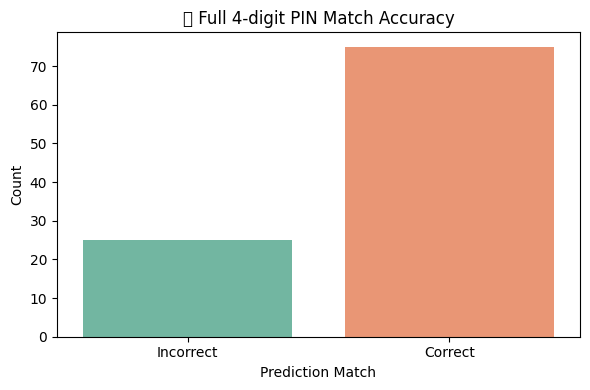

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make result DataFrame
results_df = pd.DataFrame({
    "True PIN": true_pins,
    "Predicted PIN": predicted_pins
})
results_df["Match"] = results_df["True PIN"] == results_df["Predicted PIN"]

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=results_df, x="Match", palette="Set2")
plt.title("🔐 Full 4-digit PIN Match Accuracy")
plt.xlabel("Prediction Match")
plt.ylabel("Count")
plt.xticks([0, 1], ["Incorrect", "Correct"])
plt.tight_layout()
plt.show()


C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\4004102063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(digit_accuracy.keys()), y=list(digit_accuracy.values()), palette="viridis")
C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\4004102063.py:13: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


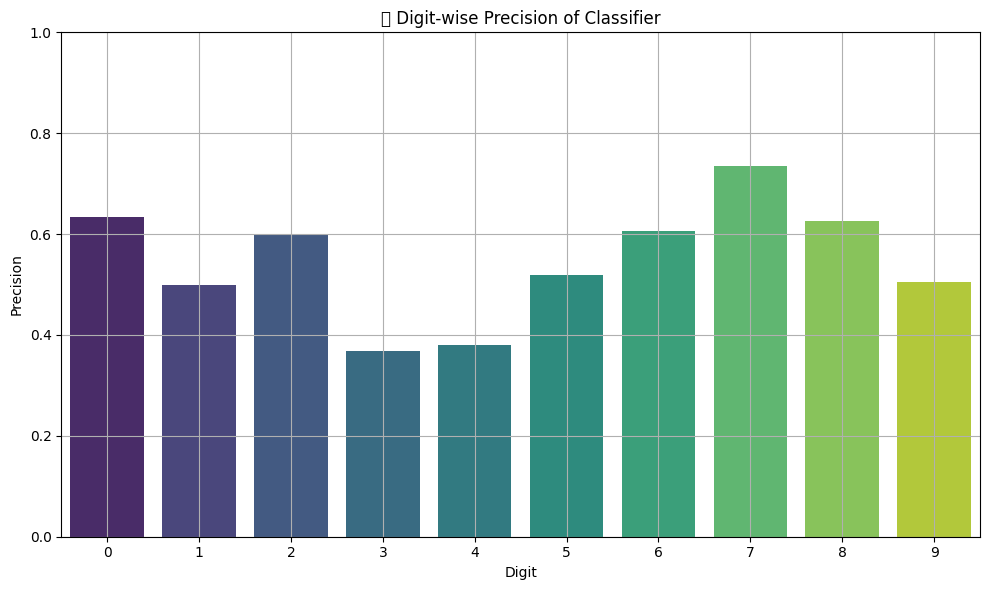

In [8]:
from sklearn.metrics import classification_report

digit_report = classification_report(y_test, model.predict(X_test), output_dict=True)
digit_accuracy = {k: v["precision"] for k, v in digit_report.items() if k.isdigit()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(digit_accuracy.keys()), y=list(digit_accuracy.values()), palette="viridis")
plt.title("🔢 Digit-wise Precision of Classifier")
plt.xlabel("Digit")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import accuracy_score

stress_conditions = df["condition"].unique()
stress_results = {}

for cond in stress_conditions:
    subset = df[df["condition"] == cond]
    X = subset[["avg_time", "std_time", "cpu_load", "mem_load"]]
    y = subset["char"]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    stress_results[cond] = acc


C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\3682954139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(stress_results.keys()), y=list(stress_results.values()), palette="magma")
C:\Users\dharm\AppData\Local\Temp\ipykernel_14672\3682954139.py:8: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\users\dharm\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


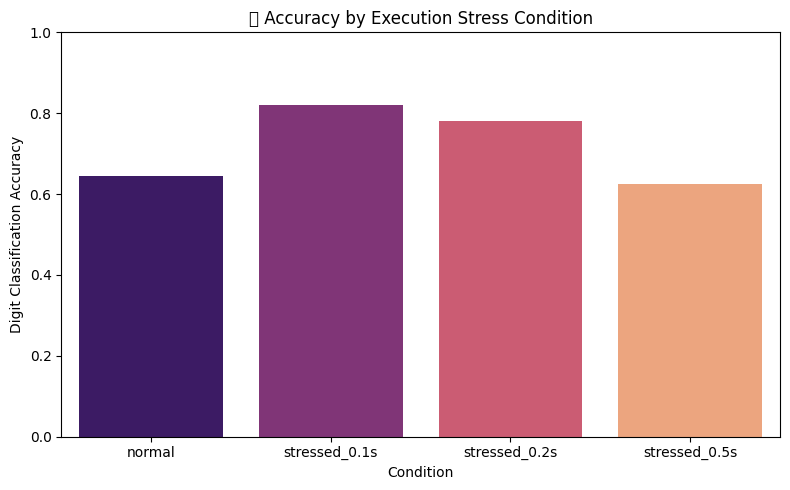

In [10]:
# Plotting stress condition accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(stress_results.keys()), y=list(stress_results.values()), palette="magma")
plt.title("🧠 Accuracy by Execution Stress Condition")
plt.xlabel("Condition")
plt.ylabel("Digit Classification Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
